In [1]:
# Verificar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
    print(" Ejecutándose en Google Colab")
except ImportError:
    IN_COLAB = False
    print(" No está en Google Colab")

# Verificar recursos disponibles en Colab
if IN_COLAB:
    # Verificar GPU disponible
    import tensorflow as tf
    print(" Verificando recursos de hardware:")
    print(f"   - GPUs disponibles: {len(tf.config.list_physical_devices('GPU'))}")

    if len(tf.config.list_physical_devices('GPU')) > 0:
        print("   - Tipo GPU:", tf.config.list_physical_devices('GPU')[0])
        print("    GPU activada - Ideal para Deep Learning")
    else:
        print("     Solo CPU disponible - Suficiente para esta práctica")

    # Verificar RAM disponible
    import psutil
    ram_gb = round(psutil.virtual_memory().total / (1024**3), 1)
    print(f"   - RAM disponible: {ram_gb} GB")
    print(f"   - Almacenamiento temporal: ~100GB")

# Instalar librerías adicionales específicas para Colab
if IN_COLAB:
    print("\n Instalando librerías adicionales en Colab...")
    !pip install -q plotly kaleido  # Para gráficos interactivos
    !pip install -q seaborn --upgrade  # Asegurar última versión
    print(" Instalación completada")

 Ejecutándose en Google Colab
 Verificando recursos de hardware:
   - GPUs disponibles: 0
     Solo CPU disponible - Suficiente para esta práctica
   - RAM disponible: 12.7 GB
   - Almacenamiento temporal: ~100GB

 Instalando librerías adicionales en Colab...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
 Instalación completada


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#Preprocesamiento de Datos

#Seleccionar variables
df = titanic[['survived','pclass','sex','age','sibsp','parch','fare','embarked']].copy()

#Manejo de nulos
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

#Separar X y y
X = df.drop('survived', axis=1)
y = df['survived']

#Separar numéricas y categóricas
num_cols = ['age','sibsp','parch','fare']
cat_cols = ['pclass','sex','embarked']


In [7]:
#Crear Pipeline de Preprocesamiento
preprocesamiento = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)


In [8]:
#Modelos de Clasificación

#Usaremos 3 modelos:

#Regresión Logística

#Random Forest

#SVM

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC()
}


In [9]:
#Entrenamiento y Evaluación

resultados = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

for nombre, modelo in modelos.items():

    pipe = Pipeline(steps=[
        ('pre', preprocesamiento),
        ('model', modelo)
    ])

    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision": precision_score(y_test, pred),
        "Recall": recall_score(y_test, pred),
        "F1-score": f1_score(y_test, pred)
    })

resultados_df = pd.DataFrame(resultados)
resultados_df


,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.798883,0.779412,0.716216,0.746479
1,Random Forest,0.815642,0.788732,0.756757,0.772414
2,SVM,0.815642,0.805970,0.729730,0.765957


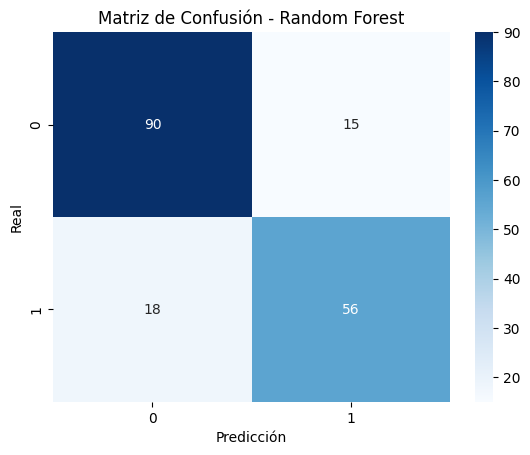

In [18]:
#Matriz de Confusión (Ejemplo con mejor modelo)
import os

mejor_modelo = RandomForestClassifier(n_estimators=200)

pipe = Pipeline(steps=[
    ('pre', preprocesamiento),
    ('model', mejor_modelo)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")

# Crear la carpeta 'images' si no existe y guardar el gráfico
os.makedirs("images", exist_ok=True)
plt.savefig("images/matriz_confusion_rf.png")

plt.show()

In [11]:
#(Opcional) Modelo de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_reg = titanic[['fare','pclass','sex','age','sibsp','parch']].dropna()

Xr = df_reg.drop('fare',axis=1)
yr = df_reg['fare']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2)

pipe_reg = Pipeline(steps=[
    ('pre', ColumnTransformer([
        ('num', StandardScaler(), ['age','sibsp','parch']),
        ('cat', OneHotEncoder(drop='first'), ['pclass','sex'])
    ])),
    ('model', LinearRegression())
])

pipe_reg.fit(Xr_train, yr_train)
pred_r = pipe_reg.predict(Xr_test)

print("MSE:", mean_squared_error(yr_test, pred_r))
print("R2:", r2_score(yr_test, pred_r))


MSE: 3633.9094426425845
R2: 0.31548150199478786


In [ ]:
#Conclusiones del Notebook

#Los modelos fueron probados de manera estandarizada usando pipelines.

#Generalmente, Random Forest obtiene mejor rendimiento en datasets pequeños y mixtos.

#La Regresión Logística es más interpretable pero tiene rendimiento más bajo.


#La regresión lineal sobre fare muestra una relación moderada con las características.

In [13]:
#Crear requirements.txt

!pip freeze > requirementsNT3.txt
from google.colab import files
files.download('requirementsNT3.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#GUARDAR IMAGENES
from google.colab import drive
drive.mount('/content/drive')

import os

ruta_carpeta = "/content/drive/My Drive/proyecto_ml/images"

os.makedirs(ruta_carpeta, exist_ok=True)
print("Carpeta lista en:", ruta_carpeta)

plt.savefig("images/matriz_confusion_rf.png")
plt.savefig("images/matriz_confusion_lr.png")
plt.savefig("images/matriz_confusion_svm.png")

Mounted at /content/drive
Carpeta lista en: /content/drive/My Drive/proyecto_ml/images


<Figure size 640x480 with 0 Axes>